In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io

from scipy.stats import multivariate_normal
from skimage import img_as_float

#T1 T2 T3 T4

In [ ]:
x = np.linspace(0, 5, 10, endpoint=False)
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

In [ ]:
np.random.rand(5)

array([0.30449484, 0.27948828, 0.32991903, 0.34690445, 0.30814302])

In [ ]:
class EM:
  def __init__(self, X, k):
    X_len = len(X)
    self.X = X
    self.k = k 
    
    self.theta = np.ones(k)
    self.theta /= self.theta.sum()

    self.w = np.zeros((self.X.shape[0], self.k))
    self.means = np.zeros((self.k,self.X.shape[1]))
    self.cov = np.zeros((self.k, self.X.shape[1], self.X.shape[1]))

    for i in range(self.k) :
      self.cov[i, :, :] = np.eye(self.X.shape[1])

  def epextation(self):
    p = np.zeros((self.X.shape[0], self.k))
    for i in range(self.k) :
      p[:,i] = multivariate_normal.pdf(X, self.means[i, :], self.cov[i, :, :])
    p = p*self.theta
    sum_p = np.sum(p, axis=1).reshape(-1, 1)
    self.w = p/sum_p

  def maximization(self):

    self.theta = np.sum(self.w, axis = 0)/self.X.shape[0]
    self.means = np.matmul(self.w.T, self.X)/self.w.T.sum(axis = 1).reshape(-1,1)

    for i in range(self.k) :
      dif = self.X - self.means[i, :]
      mul_dif = self.w[:, i].reshape(-1, 1) * dif
      self.cov[i, :, :] = np.matmul(dif.T, mul_dif)/self.w[:,i].sum()
      self.cov[i, 0, 1] = 0
      self.cov[i, 1, 0] = 0

  def iteration(self):
    self.epextation()
    self.maximization()

  def likelihood(self):
    p = np.zeros((self.X.shape[0], self.k))
    print(p.shape)
    for i in range(self.k) :
      p[:,i] = multivariate_normal.pdf(X, self.means[i, :], self.cov[i, :, :])
      
    return np.log(np.matmul(p,self.theta)).sum()

In [ ]:
X = [[1, 2], [3, 3], [2, 2], [8, 8], [6, 6], [7, 7], [-3, -3], [-2, -4], [-7, -7]]
X = np.array(X)

Iteration:  0
Theta: 
[0.45757242 0.20909425 0.33333333]
W: 
[1.19202922e-01 8.80797076e-01 1.81545808e-09]
[7.31058579e-01 2.68941421e-01 1.69570706e-16]
[2.68941421e-01 7.31058579e-01 1.01529005e-11]
[9.99983299e-01 1.67014218e-05 2.03105874e-42]
[9.99088949e-01 9.11051194e-04 5.37528453e-32]
[9.99876605e-01 1.23394576e-04 3.30529272e-37]
[2.31952283e-16 1.38879439e-11 1.00000000e+00]
[2.31952283e-16 1.38879439e-11 1.00000000e+00]
[3.30570063e-37 5.90009054e-29 1.00000000e+00]
Means: 
[5.78992692 5.81887265]
[1.67718211 2.14523106]
[-4.         -4.66666666]
Cov: 
[[4.53619412 0.        ]
 [0.         4.28700611]]
[[0.51645579 0.        ]
 [0.         0.13152618]]
[[4.66666668 0.        ]
 [0.         2.88888891]]
(9, 3)
Iteration:  1
Theta: 
[0.40711618 0.25954961 0.33333421]
W: 
[3.16932821e-03 9.96824702e-01 5.96935641e-06]
[6.55101207e-01 3.44898109e-01 6.84250685e-07]
[5.77503537e-03 9.94223665e-01 1.30002282e-06]
[1.00000000e+00 9.14501760e-73 4.53098372e-19]
[1.00000000e+00 3.1

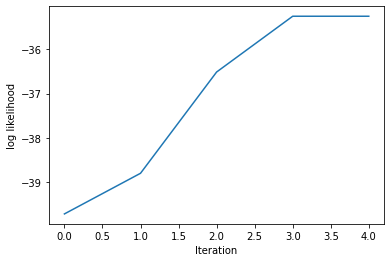

In [ ]:
em1 = EM(X, 3)
means = np.array([[3, 3], [2, 2], [-3, -3]])
em1.means = means

likelihoods1 = list()

for i in range(5):
  em1.iteration()
  print("Iteration: ", i)
  print("Theta: ")
  print(em1.theta)
  print("W: ")
  for i in em1.w:
    print(i)
  print("Means: ")
  for i in em1.means:
    print(i)
  print("Cov: ")
  for i in em1.cov:
    print(i)
  likelihoods1.append(em1.likelihood())

plt.xlabel("Iteration")
plt.ylabel("log likelihood")
plt.plot(likelihoods1)

Iteration:  0
Theta: 
[0.66666666 0.33333334]
W: 
[9.99999985e-01 1.52299795e-08]
[1.00000000e+00 2.31952283e-16]
[1.00000000e+00 3.77513454e-11]
[1.00000000e+00 2.03109266e-42]
[1.00000000e+00 5.38018616e-32]
[1.00000000e+00 3.30570063e-37]
[2.31952283e-16 1.00000000e+00]
[2.31952283e-16 1.00000000e+00]
[3.30570063e-37 1.00000000e+00]
Means: 
[4.50000001 4.66666667]
[-3.99999997 -4.66666663]
Cov: 
[[6.91666665 0.        ]
 [0.         5.88888889]]
[[4.66666677 0.        ]
 [0.         2.8888891 ]]
(9, 2)
Iteration:  1
Theta: 
[0.66669436 0.33330564]
W: 
[9.99879274e-01 1.20725832e-04]
[9.99999741e-01 2.59403362e-07]
[9.99975922e-01 2.40783341e-05]
[1.00000000e+00 9.39286607e-19]
[1.00000000e+00 7.41043154e-14]
[1.0000000e+00 2.9836637e-16]
[2.41448223e-04 9.99758552e-01]
[1.52869075e-04 9.99847131e-01]
[5.22429300e-09 9.99999995e-01]
Means: 
[4.49961311 4.66620178]
[-3.99993241 -4.66651231]
Cov: 
[[6.91944755 0.        ]
 [0.         5.89275124]]
[[4.66806942 0.        ]
 [0.         

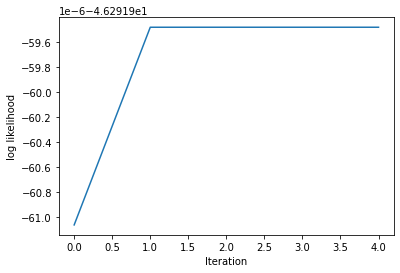

In [ ]:
em2 = EM(X, 2)
means = np.array([[3, 3], [-3, -3]])
em2.means = means

likelihoods2 = list()

for i in range(5):
  em2.iteration()
  print("Iteration: ", i)
  print("Theta: ")
  print(em2.theta)
  print("W: ")
  for i in em2.w:
    print(i)
  print("Means: ")
  for i in em2.means:
    print(i)
  print("Cov: ")
  for i in em2.cov:
    print(i)
  likelihoods2.append(em2.likelihood())

plt.xlabel("Iteration")
plt.ylabel("log likelihood")
plt.plot(likelihoods2)

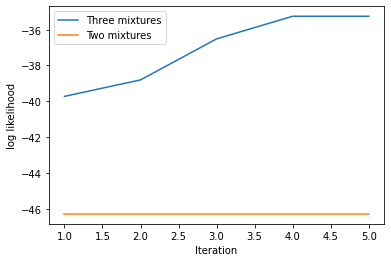

In [ ]:
x = np.linspace(1, 5, 5)
plt.plot(x, likelihoods1, label = "Three mixtures")
plt.plot(x, likelihoods2, label = "Two mixtures")
plt.xlabel("Iteration")
plt.ylabel("log likelihood")
plt.legend()

In [ ]:
np.linspace(1, 5, 5)

array([1., 2., 3., 4., 5.])

#Data manipulation


In [8]:
#Data path to mat file
mat_path = "/content/facedata.mat"

In [9]:
data = scipy.io.loadmat(mat_path)
data_facedata = data['facedata']

In [10]:
T = list()
D = list()
for i in range(40):
  for j in range(3):
    T.append(img_as_float(data_facedata[i, j]).reshape(-1,1))

for i in range(40):
  for j in range(3,10):
    D.append(img_as_float(data_facedata[i, j]).reshape(-1,1))

In [11]:
pic00 = img_as_float(data['facedata'][0,0]).reshape(-1 , 1)
pic01 = img_as_float(data['facedata'][0,1]).reshape(-1 , 1)

pic10 = img_as_float(data['facedata'][1,0]).reshape(-1 , 1)
pic11 = img_as_float(data['facedata'][1,1]).reshape(-1 , 1)

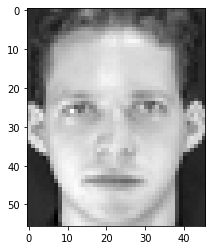

In [12]:
plt.imshow(data['facedata'][0,0], cmap = "gray")

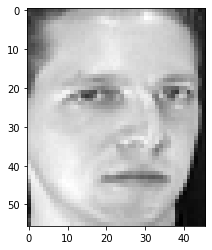

In [13]:
plt.imshow(data['facedata'][0,1], cmap = "gray")

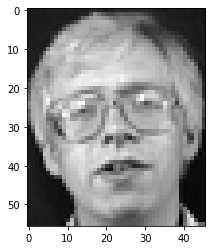

In [14]:
plt.imshow(data['facedata'][1,0], cmap = "gray")

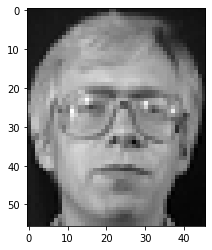

In [15]:
plt.imshow(data['facedata'][1,1], cmap = "gray")

#T5


In [ ]:
np.linalg.norm(pic00-pic01, ord = 2)

10.037616294165492

In [ ]:
np.linalg.norm(pic10-pic00, ord = 2)

8.173295099737283

In [ ]:
np.linalg.norm(pic10-pic11, ord = 2)

5.824297830071833

#T6

In [ ]:
def get_similarity_matrix(T, D):
  similarity_matrix = np.zeros((120, 280))
  for i in range(120):
    for j in range(280):
      similarity_matrix[i, j] = np.linalg.norm(T[i]-D[j], ord = 2)
  return similarity_matrix

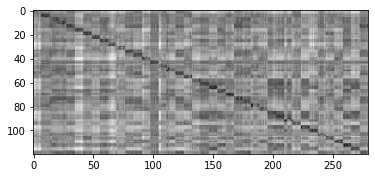

In [ ]:
plt.imshow(get_similarity_matrix(T, D), cmap = "gray")

#T7


In [ ]:
## Available on write up.

#T8


In [ ]:
def simple_face_verification(T, D, t, verbose = False):
  TP, FP, TN, FN = 0, 0, 0, 0
  for i in range(40):
    for j in range(7):
      img = D[i*7+j]
      for w in range(40):
        dist = list()
        for s in range(3):
          com = T[w*3+s]
          dist.append(np.linalg.norm(com-img, ord = 2))
        if(min(dist)<t):
          if(i==w): #TP
            TP += 1
          else : #FP
            FP += 1
        else:
          if(i==w): #FN
            FN += 1
          else : #TN
            TN +=1
  if verbose : 
    print(TP, FP, TN, FN)
  return {
      "TPR" : TP/(TP+FN),
      "FAR" : FP/(FP+TN)
  }

In [ ]:
simple_face_verification(T,D, t = 10, verbose = True)

279 4984 5936 1


{'FAR': 0.4564102564102564, 'TPR': 0.9964285714285714}

#T9

In [ ]:
#assert False

#Awareness A large number of threshold is a cause of very slow run time.

number_of_thredshold = 100

thresholds = np.linspace(0, 20, number_of_thredshold)
TPRs = list()
FARs = list()

for threshold in thresholds:
  outcome = simple_face_verification(T,D, t=threshold)
  TPRs.append(outcome['TPR'])
  FARs.append(outcome['FAR'])

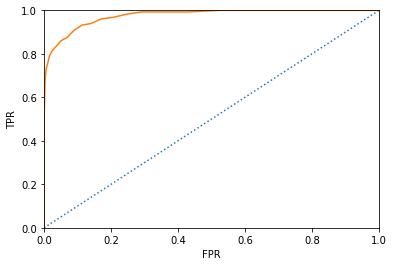

In [ ]:
x = np.arange(0,1.1,0.1)
plt.plot(x, x, ls = ':')
plt.plot(FARs, TPRs)
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

#T10


In [ ]:
for i in range(len(FARs)):
  if FARs[i] > 0.10/100:
    print(TPRs[i],thresholds[i])
    break

0.575 6.0606060606060606


In [ ]:
print(FARs[4])

0.0


In [ ]:
for i in range(len(FARs)):
  if abs((1-TPRs[i])-FARs[i]) < 0.085 :
    print(FARs[i-1], TPRs[i-1])
    print(FARs[i], TPRs[i], thresholds[i])
    print(FARs[i+1], TPRs[i+1])
    break

0.050915750915750915 0.8607142857142858
0.0685897435897436 0.875 7.878787878787879
0.08864468864468865 0.9071428571428571


#PCA Class


In [5]:
class PCA:
  def __init__(self):
    self.X = 0
    self.mean_matrix = 0
    self.mean_vector = 0
    self.X_cap = 0
    self.gam_matrix = 0
    self.cov_matrix = 0
    self.components = 0
    self.singular_value = 0
    self.singular_value_ratio = 0

  def fit(self, X):
    self.X = X.reshape(X.shape[0], X.shape[1])
    self.mean_vector = self.X.mean(axis = 1).reshape(-1, 1)
    self.X_cap = self.X - self.mean_vector
    self.cov_matrix = np.matmul(self.X_cap, self.X_cap.T)
    self.gam_matrix = np.matmul(self.X_cap.T, self.X_cap)
    self.singular_value, self.components = np.linalg.eigh(self.gam_matrix)
    self.singular_value = self.singular_value.reshape(-1, 1)
    self.singular_value = self.singular_value[::-1, :]

    self.components = (np.matmul(self.X_cap, self.components))
    self.components = self.components[:,::-1]
    temp = np.linalg.norm(self.components, axis = 0).reshape(-1, 1)
    self.components = self.components/temp.T
    self.singular_value_ratio = self.singular_value/self.singular_value.sum()

  def project(self, X, k):
    temp = X.reshape(-1, 1) if len(X.shape) == 1 else X.reshape(-1, X.shape[1])
    temp = temp - self.mean_vector
    return np.matmul(self.components[:, :k].T, temp)

  def deproject(self, X):
    return np.matmul(self.components[:, :X.shape[0]], X) + self.mean_vector

#T11


In [16]:
image_shape = (56, 46)

In [17]:
image_matrix = np.array(T)
image_matrix = image_matrix.reshape(image_matrix.shape[0], image_matrix.shape[1]).T
image_matrix.shape

(2576, 120)

In [18]:
pca = PCA()
pca.fit(image_matrix)

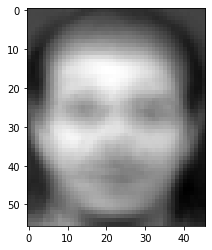

In [19]:
plt.imshow(pca.mean_vector.reshape(image_shape), cmap = "gray")

#T12 T13


In [ ]:
np.linalg.matrix_rank(pca.cov_matrix)

119

In [ ]:
np.linalg.matrix_rank(pca.gam_matrix)

119

#T14 T15

In [ ]:
pca.singular_value.reshape(-1)

array([ 1.42392971e+03,  8.75375177e+02,  5.58624400e+02,  4.07347157e+02,
        3.71021274e+02,  2.63280801e+02,  2.03396990e+02,  1.90965101e+02,
        1.66548056e+02,  1.43570551e+02,  1.22951200e+02,  1.04788229e+02,
        9.36606993e+01,  8.52020934e+01,  8.00790884e+01,  7.22926270e+01,
        6.92896016e+01,  6.55557914e+01,  6.16791259e+01,  5.90743553e+01,
        5.42659430e+01,  5.19180210e+01,  4.60439029e+01,  4.49517564e+01,
        4.38154370e+01,  4.17882938e+01,  4.04839086e+01,  3.80160594e+01,
        3.72939497e+01,  3.42784031e+01,  3.38082909e+01,  3.24110643e+01,
        3.01160763e+01,  2.88090967e+01,  2.76934934e+01,  2.72362796e+01,
        2.63193795e+01,  2.55181270e+01,  2.42531018e+01,  2.33566654e+01,
        2.24888684e+01,  2.22128871e+01,  2.13271981e+01,  2.05964187e+01,
        1.97567698e+01,  1.91068901e+01,  1.86898335e+01,  1.81386227e+01,
        1.79801629e+01,  1.69617092e+01,  1.63867949e+01,  1.56952212e+01,
        1.56409226e+01,  

#T16


Text(0, 0.5, 'Eigen value')

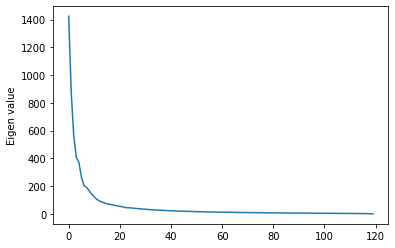

In [ ]:
plt.plot(pca.singular_value)
plt.ylabel('Eigen value')

In [ ]:
pca.singular_value[:64].sum()/pca.singular_value.sum()

0.9514558774601829

# T17&T18


In [ ]:
pca.components.shape

(2576, 120)

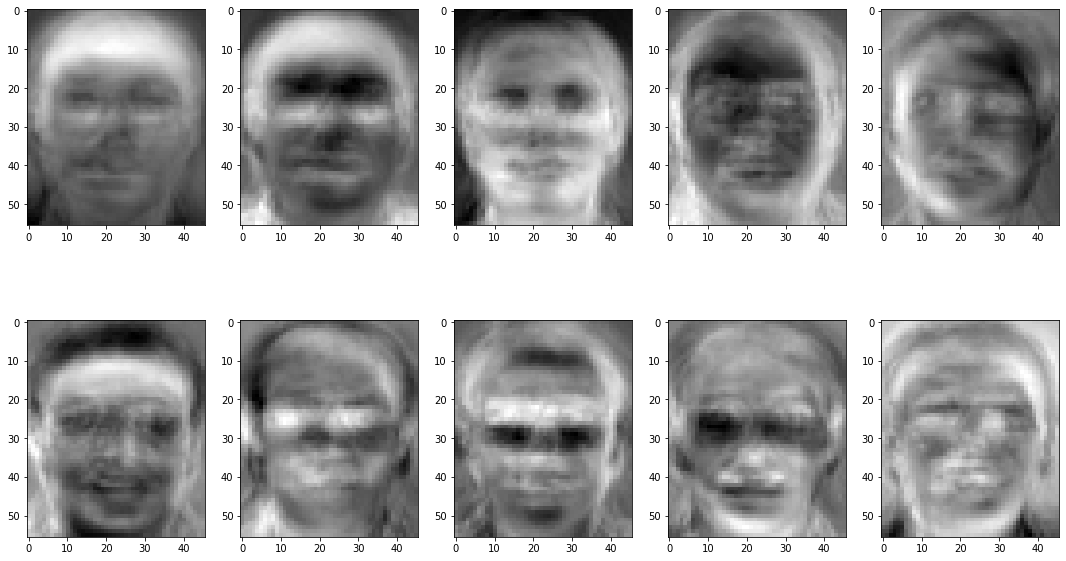

In [ ]:
fig, axs = plt.subplots(2, 5)
fig.set_size_inches(18.5, 10.5)
for i in range(10):
  axs[int(i/5), i%5].imshow(pca.components[:, i].reshape(image_shape), cmap = 'gray')

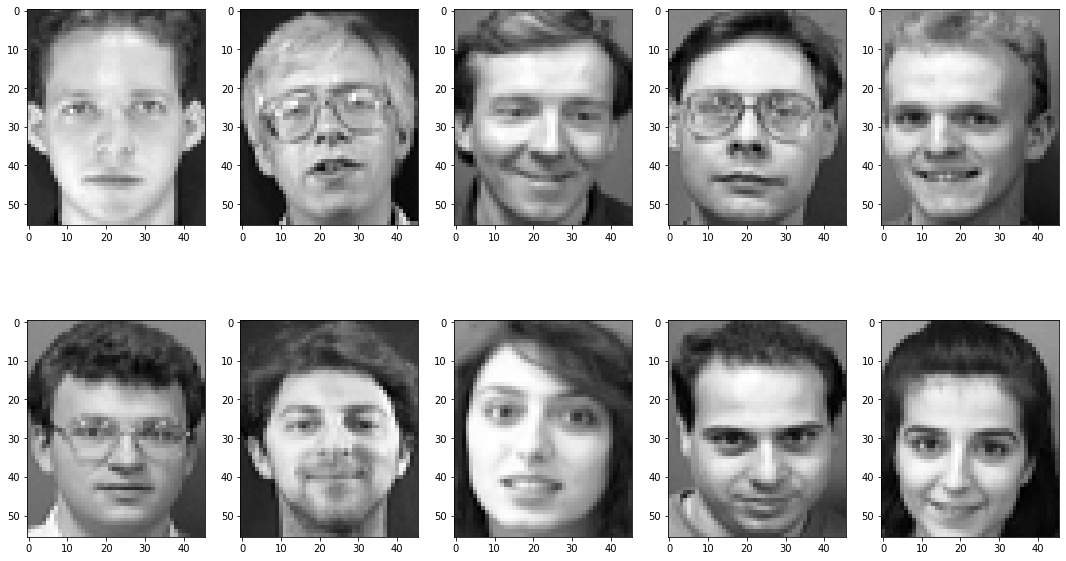

In [ ]:
fig, axs = plt.subplots(2, 5)
fig.set_size_inches(18.5, 10.5)
for i in range(10):
  axs[int(i/5), i%5].imshow(data_facedata[i,0].reshape(image_shape), cmap = 'gray')

#T19

In [22]:
T = np.array(T)
T = T.reshape(T.shape[0], T.shape[1]).T
D = np.array(D)
D = D.reshape(D.shape[0], D.shape[1]).T
T.shape, D.shape

((2576, 120), (2576, 280))

In [ ]:
projected_T_pca = pca.project(T, k = 10)
projected_D_pca = pca.project(D, k = 10)
projected_T_pca.shape, projected_D_pca.shape

((10, 120), (10, 280))

In [ ]:
def get_similarity_matrix2(T, D):
  similarity_matrix = np.zeros((120, 280))
  for i in range(120):
    for j in range(280):
      similarity_matrix[i, j] = np.linalg.norm(T[:, i]-D[:, j], ord = 2)
  return similarity_matrix

In [ ]:
def simple_face_verification2(T, D, t, verbose = False):
  TP, FP, TN, FN = 0, 0, 0, 0
  for i in range(40):
    for j in range(7):
      img = D[:, i*7+j]
      for w in range(40):
        dist = list()
        for s in range(3):
          com = T[:, w*3+s]
          dist.append(np.linalg.norm(com-img, ord = 2))
        if(min(dist)<t):
          if(i==w): #TP
            TP += 1
          else : #FP
            FP += 1
        else:
          if(i==w): #FN
            FN += 1
          else : #TN
            TN +=1
  if verbose : 
    print(TP, FP, TN, FN)
  return {
      "TPR" : TP/(TP+FN),
      "FAR" : FP/(FP+TN)
  }

In [ ]:
similarity_matrix = get_similarity_matrix2(projected_T_pca, projected_D_pca)
similarity_matrix.shape

(120, 280)

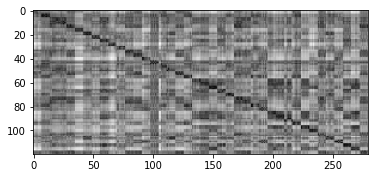

In [ ]:
plt.imshow(similarity_matrix, cmap = 'gray')

In [ ]:
similarity_matrix.max()

15.82038362801947

In [ ]:
simple_face_verification2(projected_T_pca, projected_D_pca, 10, verbose = True)

280 9210 1710 0


{'FAR': 0.8434065934065934, 'TPR': 1.0}

In [ ]:
number_of_thredshold = 1000

thresholds = np.linspace(0, 16, number_of_thredshold)
TPRs_pca = list()
FARs_pca = list()

for threshold in thresholds:
  outcome = simple_face_verification2(projected_T_pca, projected_D_pca, t=threshold)
  TPRs_pca.append(outcome['TPR'])
  FARs_pca.append(outcome['FAR'])

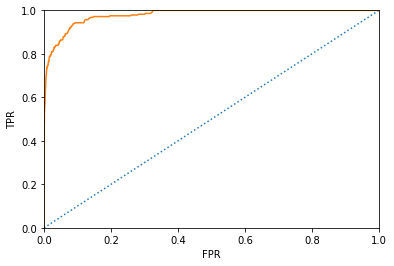

In [ ]:
x = np.arange(0,1.1,0.1)
plt.plot(x, x, ls = ':')
plt.plot(FARs_pca, TPRs_pca)
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [ ]:
for i in range(len(TPRs_pca)):
  if FARs_pca[i]>= 0.001:
    print(TPRs_pca[i], thresholds[i])
    break

0.5142857142857142 2.6106106106106104


In [ ]:
for i in range(len(TPRs_pca)):
  if abs((1-TPRs_pca[i])-FARs_pca[i]) < 0.03 :
    print(FARs_pca[i-1], TPRs_pca[i-1])
    print(FARs_pca[i], TPRs_pca[i], thresholds[i])
    print(FARs_pca[i+1], TPRs_pca[i+1])
    break

0.06932234432234433 0.8964285714285715
0.0706043956043956 0.9 4.676676676676677
0.07124542124542124 0.9


#T20


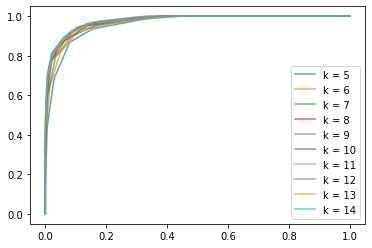

In [ ]:
for i in range(5, 15):
  
  projected_T = pca.project(T, k = i)
  projected_D = pca.project(D, k = i)
  number_of_thredshold = 20
  thresholds = np.linspace(0, 16, number_of_thredshold)

  TPRs = list()
  FARs = list()

  for threshold in thresholds:
    outcome = simple_face_verification2(projected_T,projected_D, t=threshold)
    TPRs.append(outcome['TPR'])
    FARs.append(outcome['FAR'])
  plt.plot(FARs, TPRs, label = "k = "+str(i), alpha = 0.7)

plt.legend()

#T21


In [ ]:
#Available on write up

#LDA Class


In [ ]:
class LDA:
  def __init__(self, dim, num_per_class):
    self.num_per_class = num_per_class
    self.dim = dim
    self.num_of_class = 0
    self.SB = np.zeros((dim, dim))
    self.SW = np.zeros((dim, dim))
    self.mean_X = np.zeros((dim, 1))
    self.mean_class_X = 0
    self.LDA_matrix = 0
    self.singualar_value = 0
    self.components = 0

  def fit(self, X):

    self.num_of_class = int(X.shape[1]/self.num_per_class)
    self.mean_class_X = np.zeros((self.dim, self.num_of_class))

    self.mean_X = X.mean(axis = 1).reshape(-1, 1)
    temp = X - self.mean_X

    for i in range(self.num_of_class):
      temp = X[:, i*self.num_per_class: self.num_per_class*(i+1)]
      self.mean_class_X[:, i] = temp.mean(axis = 1)
      temp -= self.mean_class_X[:, i].reshape(-1, 1)
      self.SW += np.matmul(temp, temp.T)
      temp = self.mean_class_X[:, i].reshape(-1, 1) - self.mean_X
      self.SB += np.matmul(temp, temp.T)


    self.LDA_matrix = np.matmul(np.linalg.inv(self.SW), self.SB)
    self.singular_value, self.components = np.linalg.eig(self.LDA_matrix)

    sign = np.sign(self.singular_value)
    #self.singular_value = np.abs(self.singular_value)
    for i in range(len(sign)):
      self.components[:, i] = self.components[:, i]*sign[i]

    idx = np.abs(self.singular_value).argsort()[::-1]   
    self.singular_value = self.singular_value[idx]
    self.components = self.components[:, idx]

  def project(self, X, k = 39):
    temp = X.reshape(-1, 1) if len(X.shape) == 1 else X.reshape(-1, X.shape[1])
    temp = temp - self.mean_X
    return np.matmul(self.components[:,:k].T, temp)

  def deproject(self, X):
    return np.matmul(self.components, X) + self.mean_X

#T22


In [ ]:
dim = 120-40

In [ ]:
projected_T_lda = pca.project(T, k = dim)

In [ ]:
lda = LDA(dim, 3)
lda.fit(projected_T_lda)

In [ ]:
lda.singular_value 

array([ 1.36917494e+07+0.00000000e+00j,  4.93597810e+03+0.00000000e+00j,
        1.44384617e+03+0.00000000e+00j,  7.48187352e+02+0.00000000e+00j,
        5.74469071e+02+0.00000000e+00j,  3.87183690e+02+0.00000000e+00j,
        2.48051664e+02+0.00000000e+00j,  1.71906841e+02+0.00000000e+00j,
        1.26585061e+02+0.00000000e+00j,  1.06607491e+02+0.00000000e+00j,
        7.67088363e+01+0.00000000e+00j,  7.22738617e+01+0.00000000e+00j,
        3.78927725e+01+0.00000000e+00j,  3.26640504e+01+0.00000000e+00j,
        3.18331255e+01+0.00000000e+00j,  2.49291868e+01+0.00000000e+00j,
        2.32673579e+01+0.00000000e+00j,  1.72583144e+01+0.00000000e+00j,
        1.43056638e+01+0.00000000e+00j,  1.25046335e+01+0.00000000e+00j,
        1.07063353e+01+0.00000000e+00j,  9.50022145e+00+0.00000000e+00j,
        8.02710020e+00+0.00000000e+00j,  6.57192475e+00+0.00000000e+00j,
        5.64011574e+00+0.00000000e+00j,  4.79227241e+00+0.00000000e+00j,
        4.47543662e+00+0.00000000e+00j,  4.09103860

In [ ]:
lda.singular_value[:39]

array([1.36917494e+07+0.j, 4.93597810e+03+0.j, 1.44384617e+03+0.j,
       7.48187352e+02+0.j, 5.74469071e+02+0.j, 3.87183690e+02+0.j,
       2.48051664e+02+0.j, 1.71906841e+02+0.j, 1.26585061e+02+0.j,
       1.06607491e+02+0.j, 7.67088363e+01+0.j, 7.22738617e+01+0.j,
       3.78927725e+01+0.j, 3.26640504e+01+0.j, 3.18331255e+01+0.j,
       2.49291868e+01+0.j, 2.32673579e+01+0.j, 1.72583144e+01+0.j,
       1.43056638e+01+0.j, 1.25046335e+01+0.j, 1.07063353e+01+0.j,
       9.50022145e+00+0.j, 8.02710020e+00+0.j, 6.57192475e+00+0.j,
       5.64011574e+00+0.j, 4.79227241e+00+0.j, 4.47543662e+00+0.j,
       4.09103860e+00+0.j, 3.55918880e+00+0.j, 2.53766624e+00+0.j,
       2.22727717e+00+0.j, 1.87035204e+00+0.j, 1.61566721e+00+0.j,
       1.50186379e+00+0.j, 1.08633260e+00+0.j, 7.93598556e-01+0.j,
       7.12275306e-01+0.j, 5.01212459e-01+0.j, 3.50101376e-01+0.j])

#T23

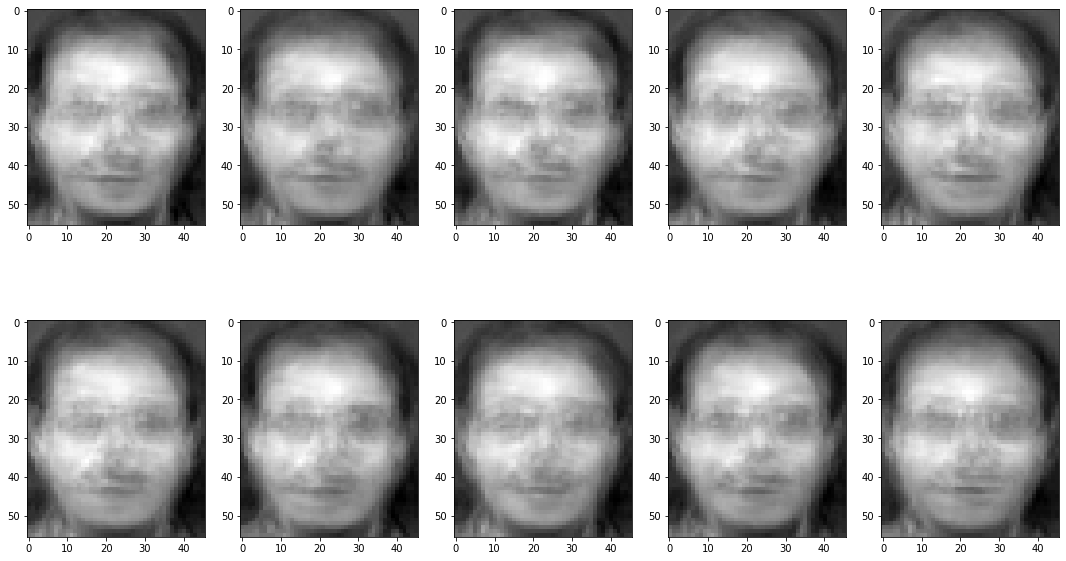

In [ ]:
fig, axs = plt.subplots(2, 5)
fig.set_size_inches(18.5, 10.5)
temp = pca.deproject(np.abs(lda.components[:, :10]))
for i in range(10):
  axs[int(i/5), i%5].imshow(temp[:, i].reshape(image_shape), cmap = 'gray')

#T24


In [ ]:
projected_D_lda = pca.project(D, k = 80)
projected_D_lda= lda.project(projected_D_lda)
projected_T_lda = pca.project(T, k = 80)
projected_T_lda = lda.project(projected_T_lda)
projected_D_lda.shape, projected_T_lda.shape

((39, 280), (39, 120))

In [ ]:
similarity_matrix = get_similarity_matrix2(projected_T_lda, projected_D_lda)
similarity_matrix.shape, similarity_matrix.max()

((120, 280), 6.439506441239784)

In [ ]:
number_of_thredshold = 1000

thresholds = np.linspace(0, 8, number_of_thredshold)
TPRs_lda = list()
FARs_lda = list()

for threshold in thresholds:
  outcome = simple_face_verification2(projected_T_lda, projected_D_lda, t=threshold)
  TPRs_lda.append(outcome['TPR'])
  FARs_lda.append(outcome['FAR'])

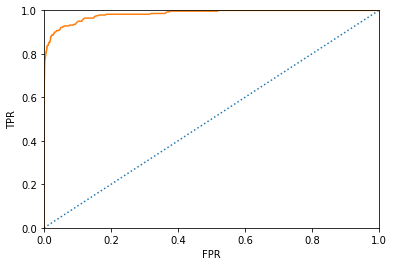

In [ ]:
x = np.arange(0,1.1,0.1)
plt.plot(x, x, ls = ':')
plt.plot(FARs_lda, TPRs_lda)
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [ ]:
for i in range(len(TPRs_lda)):
  if FARs_lda[i]> 0.001:
    print(TPRs_lda[i], thresholds[i])
    break

0.6821428571428572 2.7867867867867866


In [ ]:
for i in range(len(TPRs_lda)):
  if abs((1-TPRs_lda[i])-FARs_lda[i]) < 0.01 :
    print(FARs_lda[i-1], TPRs_lda[i-1])
    print(FARs_lda[i], TPRs_lda[i], thresholds[i])
    print(FARs_lda[i+1], TPRs_lda[i+1])
    break

0.05989010989010989 0.9285714285714286
0.06217948717948718 0.9285714285714286 3.6276276276276276
0.06346153846153846 0.9285714285714286


#T25

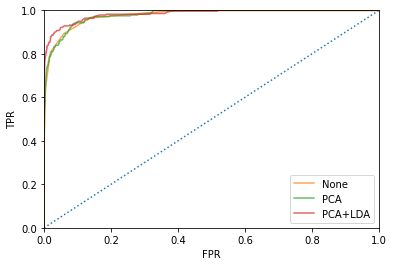

In [ ]:
x = np.arange(0,1.1,0.1)
plt.plot(x, x, ls = ':')
plt.plot(FARs, TPRs, label = "None", alpha = 0.7)
plt.plot(FARs_pca, TPRs_pca, label = "PCA", alpha = 0.7)
plt.plot(FARs_lda, TPRs_lda, label = "PCA+LDA", alpha = 0.7)
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

#OT1


In [66]:
def MSE(A, B):
  return ((A.reshape(-1, 1)-B.reshape(-1, 1))**2).mean()

In [67]:
temp = T[:, 0]
projected_temp = pca.project(temp, k = 10)
deprojected_temp_pca = pca.deproject(projected_temp)

In [68]:
projected_temp.shape

(10, 1)

In [69]:
MSE(temp, deprojected_temp_pca)

0.006148335016488304

Text(0.5, 1.0, 'Reconstructed PCA')

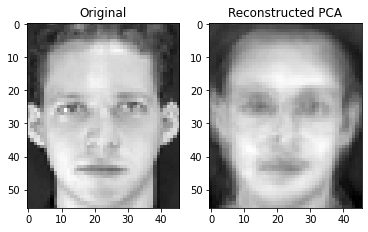

In [70]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(temp.reshape(image_shape), cmap = 'gray')
ax1.set_title("Original")
ax2.imshow(deprojected_temp_pca.reshape(image_shape), cmap = 'gray')
ax2.set_title("Reconstructed PCA")

#OT2


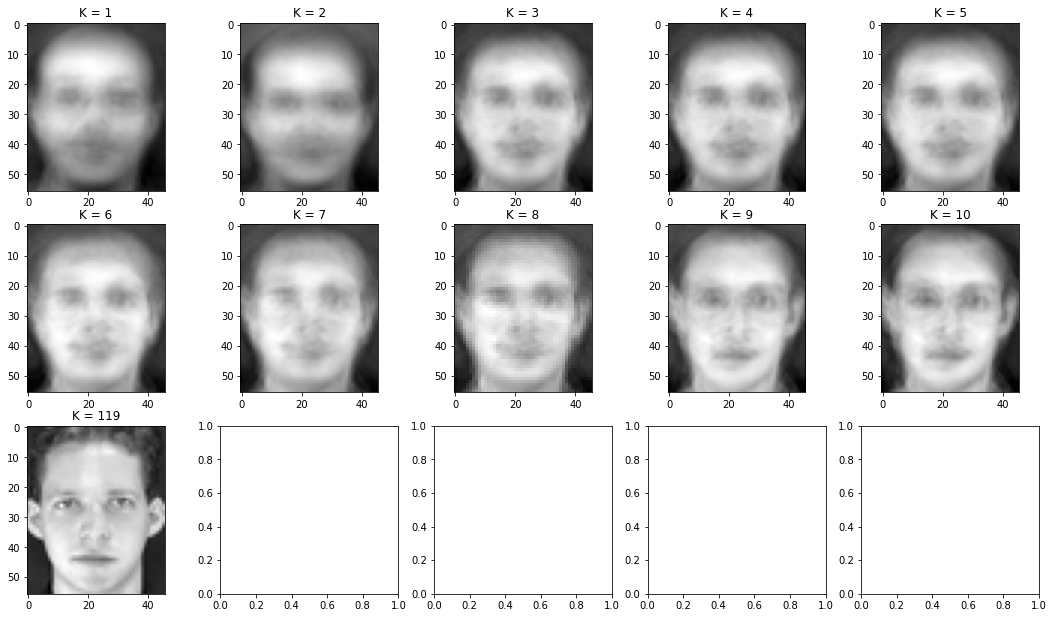

In [73]:
temp = T[:, 0]
MSEs = list()
fig, axs = plt.subplots(3, 5)
fig.set_size_inches(18.5, 10.5)
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 119]
for i in range(len(ks)):
  projected_temp = pca.project(temp, k = ks[i])
  deprojected_temp_pca = pca.deproject(projected_temp)
  axs[int(i/5), i%5].imshow(deprojected_temp_pca.reshape(image_shape), cmap = 'gray')
  axs[int(i/5), i%5].set_title("K = "+str(ks[i]))
  MSEs.append(MSE(temp, deprojected_temp_pca))

Text(0, 0.5, 'MSE')

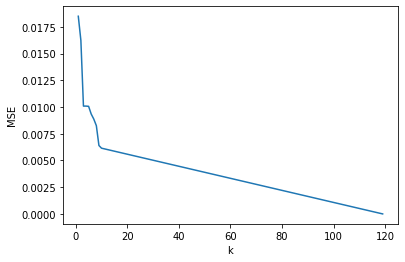

In [75]:
plt.plot([1,2,3,4,5,6,7,8,9,10, 119],MSEs)
plt.xlabel("k")
plt.ylabel('MSE')

#OT3


#OT4


In [ ]:
projected_D = pca.project(D, k = dim)
projected_D = lda.project(projected_D)
projected_D = np.abs(projected_D)
projected_D.shape

(39, 280)

Text(0, 0.5, 'Component 2')

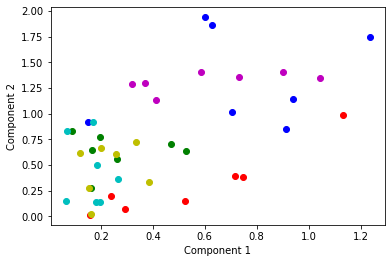

In [ ]:
color = ['b', 'g', 'r', 'c', 'y', 'm', 'k']
for i in range(6):
  for j in range(7):
    temp = projected_D[:, 7*i+j]
    plt.scatter(temp[0], temp[1], color = color[i])
  
plt.xlabel("Component 1")
plt.ylabel("Component 2")